In [1]:
import torch
import torchvision.datasets as dsets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

In [2]:
mnist_train=dsets.MNIST(root='/MNIST_data/', train=True, transform=transforms.ToTensor(),
                       download=True)
mnist_test=dsets.MNIST(root='/MNIST_data/', train=False, transform=transforms.ToTensor(),
                        download=True)
data_loader=torch.utils.data.DataLoader(dataset=mnist_train,
                                       batch_size=100,
                                       shuffle=True,
                                       drop_last=True)

In [7]:
learning_rate=0.001
training_epochs=15
batch_size=100

linear=nn.Linear(784, 10, bias=True)
nn.init.normal_(linear.weight)
criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.Adam(linear.parameters(), lr=learning_rate)

In [9]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost=0
    
    for X, Y in data_loader:
        X=X.view(-1, 28*28)
        optimizer.zero_grad()
        hypothesis=linear(X)
        cost=criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost +=cost/total_batch
    print('Epoch:', "%04d" % (epoch +1), 'cost:', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost: 4.854725838
Epoch: 0002 cost: 1.556249619
Epoch: 0003 cost: 1.045104384
Epoch: 0004 cost: 0.840728819
Epoch: 0005 cost: 0.723794401
Epoch: 0006 cost: 0.646788061
Epoch: 0007 cost: 0.591372967
Epoch: 0008 cost: 0.549144149
Epoch: 0009 cost: 0.514991283
Epoch: 0010 cost: 0.488162488
Epoch: 0011 cost: 0.465255708
Epoch: 0012 cost: 0.446358472
Epoch: 0013 cost: 0.430345386
Epoch: 0014 cost: 0.415910751
Epoch: 0015 cost: 0.403741866


In [17]:
learning_rate=0.001
training_epochs=15
batch_size=100

linear1=nn.Linear(784, 256, bias=True)
linear2=nn.Linear(256, 256, bias=True)
linear3=nn.Linear(256, 10, bias=True)
relu=nn.ReLU()

nn.init.normal_(linear1.weight)
nn.init.normal_(linear2.weight)
nn.init.normal_(linear3.weight)
model=nn.Sequential(linear1, relu ,linear2, relu,linear3)
criterion = torch.nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=learning_rate)

In [18]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 160.599365234
Epoch: 0002 cost = 36.749885559
Epoch: 0003 cost = 23.005228043
Epoch: 0004 cost = 15.831812859
Epoch: 0005 cost = 11.430957794
Epoch: 0006 cost = 8.302653313
Epoch: 0007 cost = 6.129088402
Epoch: 0008 cost = 4.573897362
Epoch: 0009 cost = 3.367820740
Epoch: 0010 cost = 2.484351158
Epoch: 0011 cost = 1.924827814
Epoch: 0012 cost = 1.459342837
Epoch: 0013 cost = 1.118363976
Epoch: 0014 cost = 0.859101474
Epoch: 0015 cost = 0.672167718
Learning finished


Accuracy: 0.9459999799728394
Label:  7
Prediction:  7


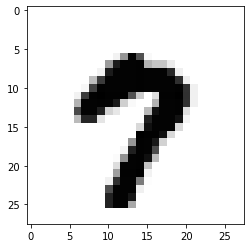

In [23]:
import random
import matplotlib.pyplot as plt
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r:r + 1]

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()